In [2]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [3]:
year = 2022 #GP year
gp = 'Melbourne' # GP name
event = 'R' # Q for qualifying, FP1 for free practice 1, R for race

In [4]:

# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
#fastf1.Cache.enable_cache('\cache')
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)

In [5]:
# Get qualification session
session = fastf1.get_session(year, gp, event)
session.load()
laps = session.laps
#laps.dropna(subset=['Driver'], inplace = True)
laps = laps.pick_accurate()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.2.1]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver  3: Ignoring late data for a previously processed lap.The data may contain errors (previous: 28; current 29)
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         W

DataNotLoadedError: The data you are trying to access has not been loaded yet. See `Session.load`

In [ ]:
# Get an array of all drivers
drivers = pd.unique(laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

['LEC' 'PER' 'RUS' 'HAM' 'NOR' 'RIC' 'OCO' 'BOT' 'GAS' 'ALB' 'ZHO' 'STR'
 'MSC' 'MAG' 'TSU' 'LAT' 'ALO' 'VER' 'VET' 'SAI']


/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:2082: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


In [ ]:
# Get the pole lap
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

In [ ]:
# Get all team colors
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

AttributeError: 'NaTType' object has no attribute 'upper'

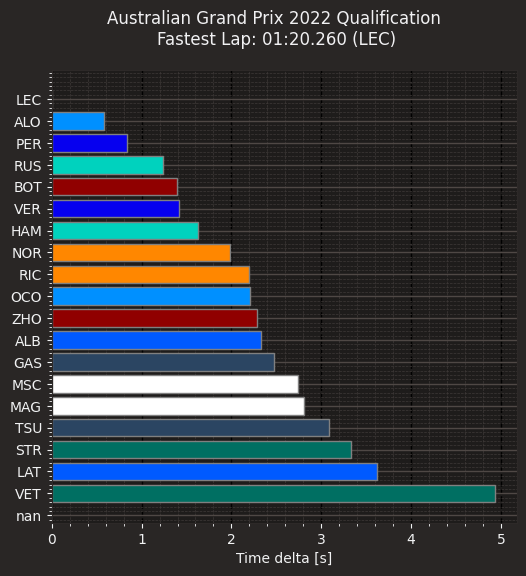

In [ ]:
# Plot the table
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.weekend.name} {session.weekend.year} Qualification \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

In [ ]:
lec_lap = laps.pick_driver('LEC').pick_fastest()
lec_tel = lec_lap.get_telemetry()
ver_lap = laps.pick_driver('VER').pick_fastest()
ver_tel = ver_lap.get_telemetry()

/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:919: FutureWarning: The property `Session.weekend` has been renamed to `Session.event`.
 The old property will be removed ina future version.
  warnings.warn("The property `Session.weekend` has been renamed to "
/opt/homebrew/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Australian Grand Prix 2022 \nFP1, Leclerc vs Verstappen')

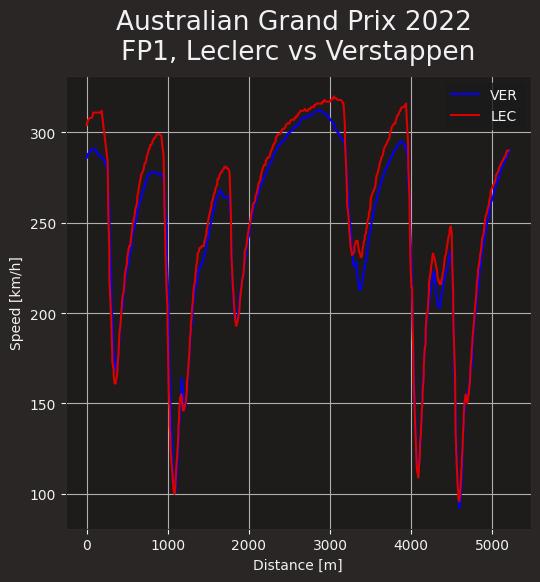

In [ ]:
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(lec_tel['Distance'], lec_tel['Speed'], label='LEC', color=fastf1.plotting.team_color('Ferrari'))
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
plt.grid()
plt.legend()
plt.title(f"{session.weekend.name} {session.weekend.year} \nFP1, Leclerc vs Verstappen")

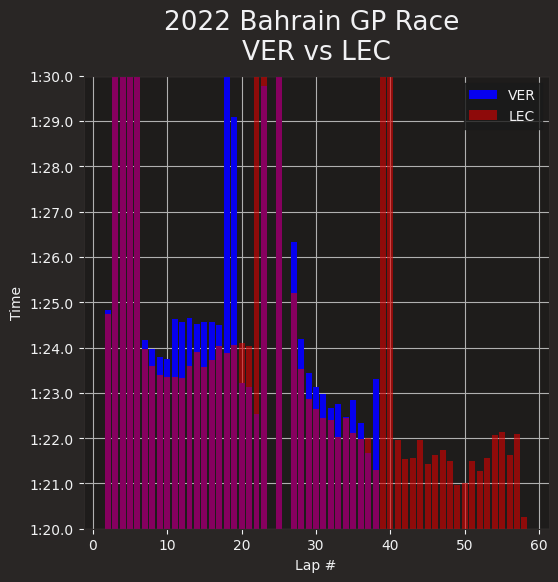

In [ ]:
plt.bar(laps.pick_driver('VER')['LapNumber'].values, laps.pick_driver('VER')['LapTime'].values, label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.bar(laps.pick_driver('LEC')['LapNumber'].values, laps.pick_driver('LEC')['LapTime'].values, label='LEC', color=fastf1.plotting.team_color('Ferrari'), alpha=0.6)
plt.ylim(pd.Timedelta(seconds=80), pd.Timedelta(seconds=90))
plt.legend()
plt.xlabel('Lap #')
plt.ylabel('Time')
plt.title('2022 Bahrain GP Race \nVER vs LEC')
plt.grid()

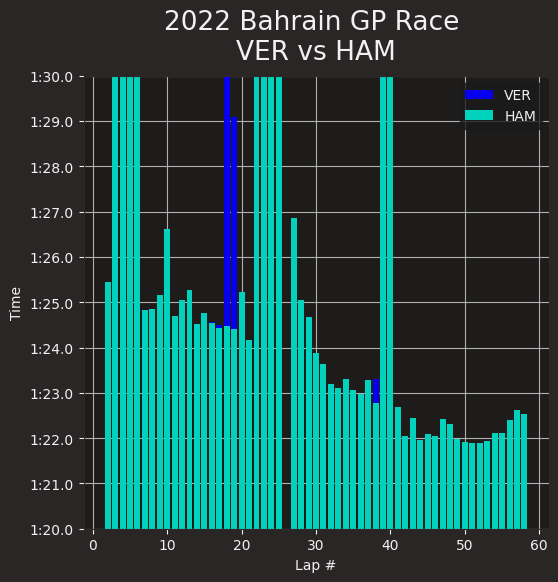

In [ ]:
plt.bar(laps.pick_driver('VER')['LapNumber'].values, laps.pick_driver('VER')['LapTime'].values, label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.bar(laps.pick_driver('HAM')['LapNumber'].values, laps.pick_driver('HAM')['LapTime'].values, label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.ylim(pd.Timedelta(seconds=80), pd.Timedelta(seconds=90))
plt.legend()
plt.xlabel('Lap #')
plt.ylabel('Time')
plt.title('2022 Bahrain GP Race \nVER vs HAM')
plt.grid()

legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


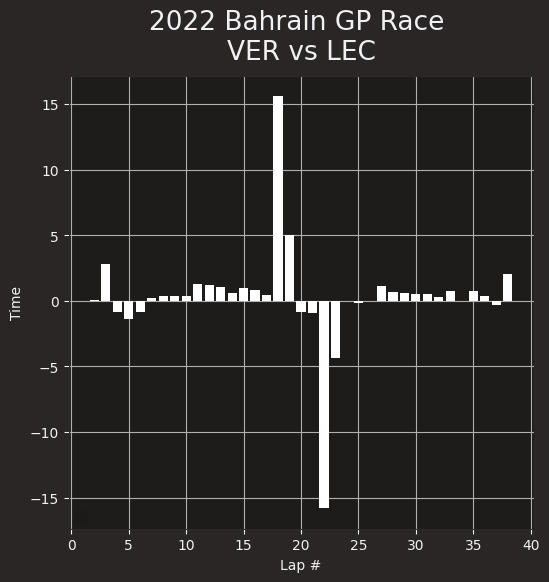

In [ ]:
ver_lec = laps.pick_driver('VER')[['LapNumber', 'LapTime']].set_index('LapNumber') - laps.pick_driver('LEC')[['LapNumber', 'LapTime']].set_index('LapNumber')
plt.bar(ver_lec.index.values, ver_lec['LapTime'].dt.total_seconds().values, color=plotting.team_color('HAAS'))
#plt.ylim(pd.Timedelta(seconds=95), pd.Timedelta(seconds=100))
plt.legend()
plt.xlabel('Lap #')
plt.ylabel('Time')
plt.title('2022 Bahrain GP Race \nVER vs LEC')
plt.grid()

legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


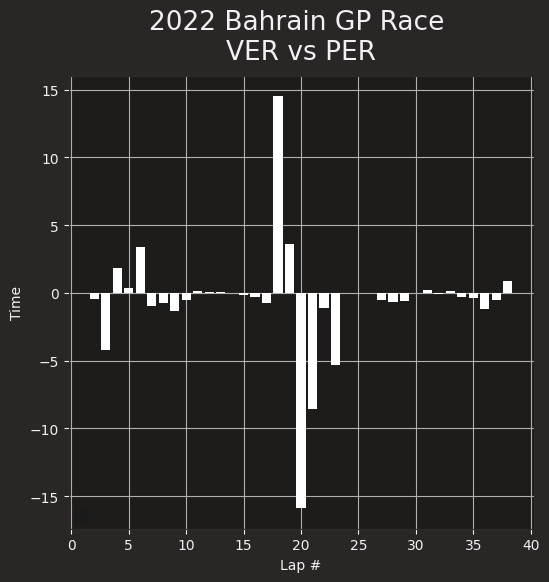

In [ ]:
delta = laps.pick_driver('VER')[['LapNumber', 'LapTime']].set_index('LapNumber') - laps.pick_driver('PER')[['LapNumber', 'LapTime']].set_index('LapNumber')
plt.bar(delta.index.values, delta['LapTime'].dt.total_seconds().values, color=plotting.team_color('HAAS'))
#plt.ylim(pd.Timedelta(seconds=95), pd.Timedelta(seconds=100))
plt.legend()
plt.xlabel('Lap #')
plt.ylabel('Time')
plt.title('2022 Bahrain GP Race \nVER vs PER')
plt.grid()

In [ ]:
laps.to_csv(r"C:\Users\sdenega\Desktop\tmp_crap\{}_laps.csv".format(session.weekend.name))
for drv in drivers:
    telemetry = laps.pick_driver(drv).get_telemetry()
    telemetry.to_csv(r"C:\Users\sdenega\Desktop\tmp_crap\{}_{}_telemetry.csv".format(session.weekend.name, drv))

In [10]:
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.2.1]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
core        WARNING 	Failed to load lap data!
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
core        WARNING 	Failed to load telemetry data!
api            INFO 	Fetching weather data...
core           INFO 	Finished loading data for 19 drivers: ['1', '16', '55', '11', '63', '31', '4', '10', '20', '44', '24', '27', '18', '23', '77', '14', '3', '6', '22']
